In [1]:
import math

In [9]:
def f(t):
    return math.exp(t)

In [22]:
def uPrima(u):
    return u
def eulerAdelantado(f, u0, T, N):
    h = T/N
    t = 0
    u = u0
    lista = [u]
    for i in range(N-1):
        u = (1 + h)*u
        lista.append(u)
        t = t + h
    return lista
print(eulerAdelantado(uPrima, 1, 4, 100))

[1, 1.04, 1.0816000000000001, 1.124864, 1.1698585600000002, 1.2166529024000003, 1.2653190184960004, 1.3159317792358405, 1.368569050405274, 1.4233118124214852, 1.4802442849183446, 1.5394540563150785, 1.6010322185676817, 1.665073507310389, 1.7316764476028046, 1.8009435055069167, 1.8729812457271935, 1.9479004955562813, 2.0258165153785326, 2.106849175993674, 2.191123143033421, 2.278768068754758, 2.369918791504948, 2.464715543165146, 2.5633041648917523, 2.6658363314874225, 2.7724697847469195, 2.8833685761367964, 2.9987033191822685, 3.1186514519495594, 3.243397510027542, 3.3731334104286437, 3.5080587468457893, 3.648381096719621, 3.7943163405884057, 3.946088994211942, 4.10393255398042, 4.268089856139637, 4.438813450385223, 4.6163659884006325, 4.801020627936658, 4.993061453054124, 5.1927839111762895, 5.4004952676233415, 5.616515078328275, 5.841175681461406, 6.0748227087198625, 6.317815617068657, 6.570528241751403, 6.83334937142146, 7.106683346278318, 7.3909506801294516, 7.6865887073346295, 7.9

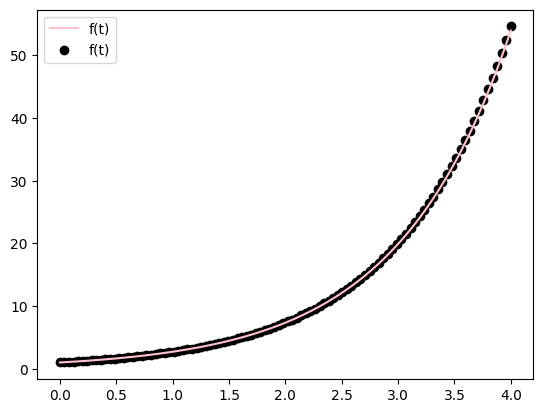

In [26]:
# graficamos f
import matplotlib.pyplot as plt
import numpy as np

t1 = np.linspace(0, 4, 100)
t2 = np.linspace(0, 4, 1000)
u = []
for i in t: 
    u.append(f(i))

plt.plot(t2, eulerAdelantado(uPrima, 1, 4, 1000), label='f(t)', color='pink')
plt.scatter(t1, u, label='f(t)', color='black')
plt.legend()

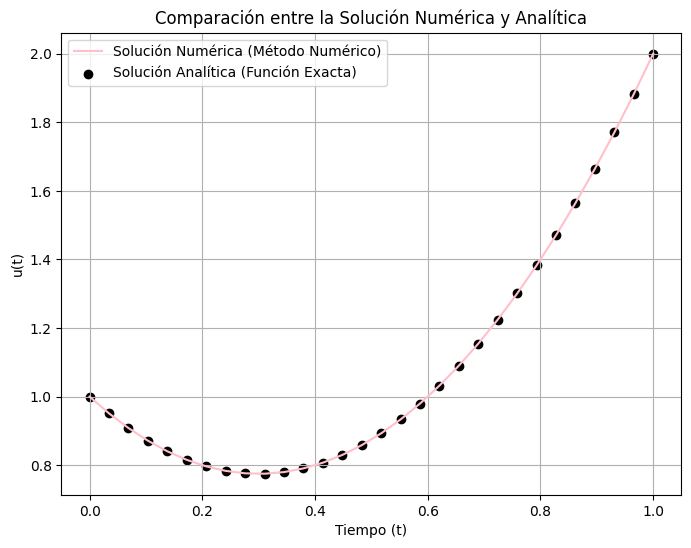

None


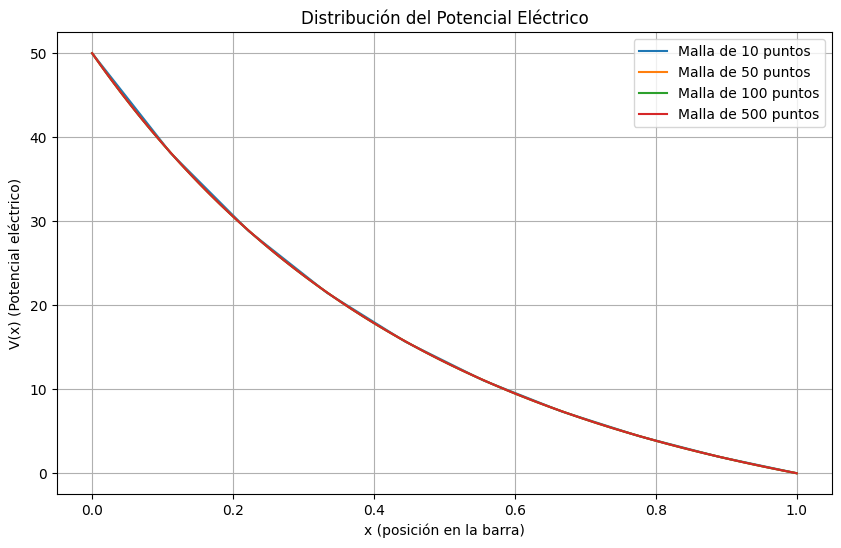

In [ ]:
def fprimaprima(t):
    return 5

def CrearMatriz(n,h):
    matrix_zeros = np.zeros((n, n))
    matrix_zeros[0][0] = 1
    matrix_zeros[-1][-1] = 1
    for i in range(1, n-1):
        matrix_zeros[i][i] = -2/h**2
        matrix_zeros[i][i-1] = 1/h**2
        matrix_zeros[i][i+1] = 1/h**2
    return matrix_zeros

def crearVector(n, h, u0, uf, f):
    vector = np.zeros(n)
    vector[0] = u0
    vector[-1] = uf
    for i in range(1, n-1):
        vector[i] = f(i*h)
    return vector
def resolverSistema(n, u0, uf, f):
    h = (uf-u0)/(n-1)
    A = CrearMatriz(n, h)
    b = crearVector(n, h, u0, uf, f)
    return np.linalg.solve(A, b)

def fanaliticamente(x):
    return 5/2*x**2 - 3/2*x + 1

#metodo graficar
def grafica(N):
    t = np.linspace(0, 1, N)
    solucion_numerica = resolverSistema(N, 1, 2)  # Resolver el sistema numérico
    solucion_analitica = fanaliticamente(t)       # Solución analítica
    
    plt.figure(figsize=(8, 6))  # Ajustar tamaño de la gráfica
    plt.plot(t, solucion_numerica, label='Solución Numérica (Método Numérico)', color='pink')
    plt.scatter(t, solucion_analitica, label='Solución Analítica (Función Exacta)', color='black')

    # Añadir título y etiquetas
    plt.title('Comparación entre la Solución Numérica y Analítica')
    plt.xlabel('Tiempo (t)')
    plt.ylabel('u(t)')
    plt.legend()  # Se corrigió la falta de paréntesis
    plt.grid(True)
    plt.show()

# Llamar la función de gráfico con N = 30
print(grafica(30))



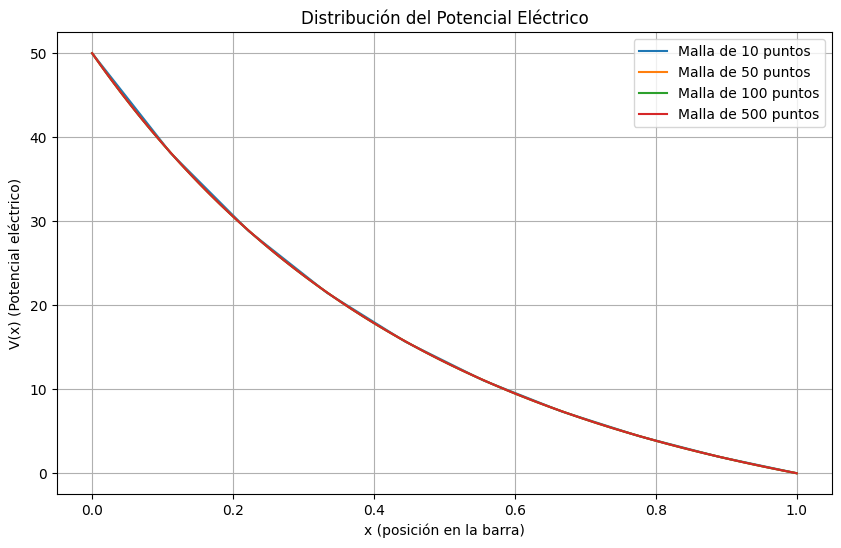

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def CrearMatriz(n, h):
    A = np.zeros((n, n))
    A[0, 0] = 1  # Condición de frontera en x=0
    A[-1, -1] = 1  # Condición de frontera en x=1
    
    for i in range(1, n - 1):
        A[i, i - 1] = 1 / h**2 - 2 / (2 * h)
        A[i, i] = -2 / h**2 - 0.5
        A[i, i + 1] = 1 / h**2 + 2 / (2 * h)
    
    return A

def CrearVector(n, h, V0, V_izq, V_der):
    b = np.zeros(n)
    b[0] = V_izq  # Condición de frontera izquierda
    b[-1] = V_der  # Condición de frontera derecha
    
    for i in range(1, n - 1):
        b[i] = -0.5 * V0
    
    return b

def ResolverSistema(n, V0, V_izq, V_der):
    h = 1 / (n - 1)  # Paso de discretización
    A = CrearMatriz(n, h)
    b = CrearVector(n, h, V0, V_izq, V_der)
    return np.linalg.solve(A, b)

def GraficarResultados():
    puntos_malla = [10, 50, 100, 500]
    x_vals = {N: np.linspace(0, 1, N) for N in puntos_malla}
    
    plt.figure(figsize=(10, 6))
    for N in puntos_malla:
        solucion = ResolverSistema(N, 10, 50, 0)
        plt.plot(x_vals[N], solucion, label=f'Malla de {N} puntos')
    
    plt.title('Distribución del Potencial Eléctrico')
    plt.xlabel('x (posición en la barra)')
    plt.ylabel('V(x) (Potencial eléctrico)')
    plt.legend()
    plt.grid(True)
    plt.show()

GraficarResultados()


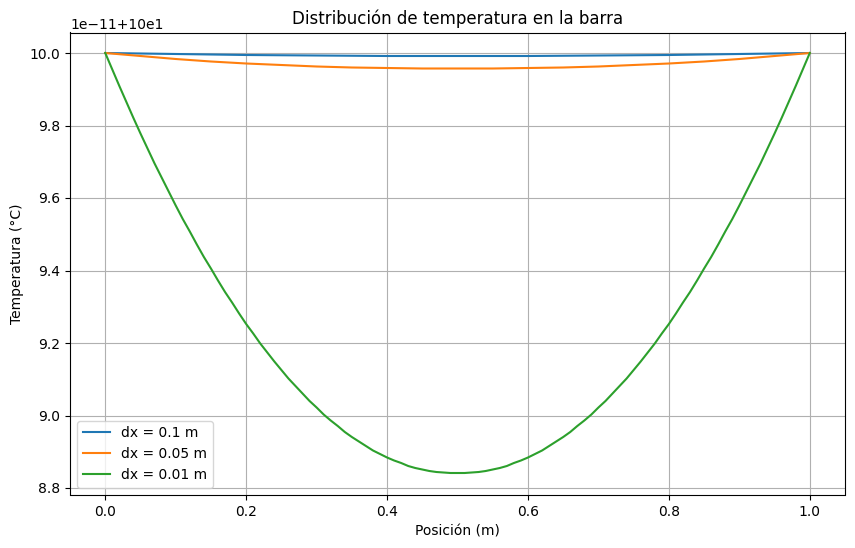

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def solucion_transporte_calor(L, dx, t_max, alpha):
    """Resuelve la ecuación de transporte de calor con diferencias finitas explícitas"""
    
    # Número de puntos espaciales
    N = int(L / dx) + 1  
    x = np.linspace(0, L, N)
    
    # Establecer un dt adecuado para estabilidad
    dt = (0.5 * dx**2) / alpha  
    n_t = int(t_max / dt)  # Número de pasos de tiempo
    
    # Inicializar temperatura
    T = np.ones(N) * 20  
    T[0] = 100  # Condición de frontera izquierda
    T[-1] = 100  # Condición de frontera derecha

    # Iteración en el tiempo
    for _ in range(n_t):
        T_new = T.copy()
        for i in range(1, N - 1):
            T_new[i] = T[i] + (alpha * dt / dx**2) * (T[i+1] - 2*T[i] + T[i-1])
        T = T_new
    
    return T, x

def graficar_resultados():
    """Grafica la distribución de temperatura para diferentes valores de dx"""
    
    L = 1.0  # Longitud de la barra
    alpha = 0.01  # Coeficiente de difusión térmica
    t_max = 1000  # Tiempo de simulación en segundos
    dx_values = [0.1, 0.05, 0.01]  # Diferentes mallados

    plt.figure(figsize=(10, 6))
    
    for dx in dx_values:
        T, x = solucion_transporte_calor(L, dx, t_max, alpha)
        plt.plot(x, T, label=f'dx = {dx} m')
    
    plt.title('Distribución de temperatura en la barra')
    plt.xlabel('Posición (m)')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejecutar la simulación
graficar_resultados()


In [ ]:
def funcionCalor_Tijmas1(Timas1j, Timenos1j, Tij, dx, dt, alpha):
    lambda_ = alpha*dt/dx**2
    return lambda_*Timas1j + (1-2*lambda_)*Tij + lambda_*Timenos1j

def CrearMatriz(n, h):
    A = np.zeros((n, n))
    A[0, 0] = 1  # Condición de frontera en x=0
    A[-1, -1] = 1  # Condición de frontera en x=1
    
    for i in range(1, n - 1):
        A[i, i - 1] = 1 / h**2 - 2 / (2 * h)
        A[i, i] = -2 / h**2 - 0.5
        A[i, i + 1] = 1 / h**2 + 2 / (2 * h)
    
    return A

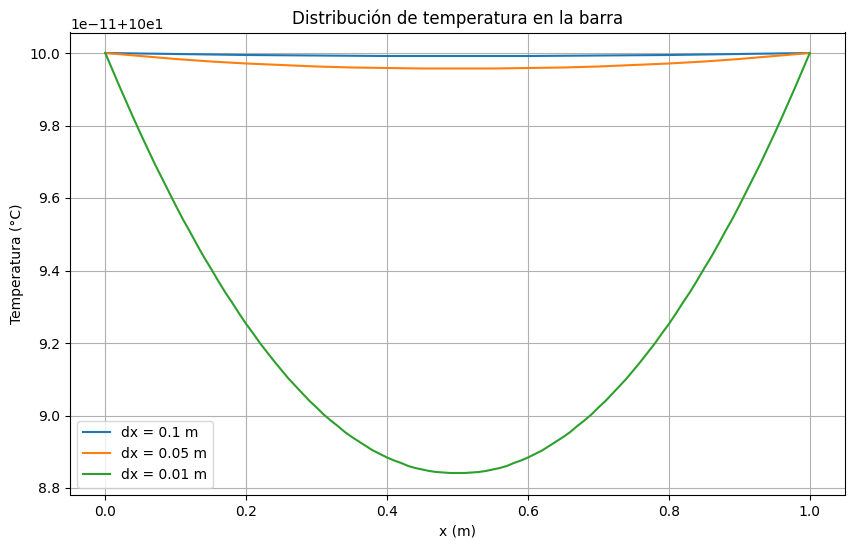

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros físicos y de simulación
L = 1.0      # Longitud de la barra (m)
t_max = 1000 # Tiempo total de simulación (s)
alpha = 0.01 # Coeficiente de difusión térmica

# Diferentes valores de dx
dx_values = [0.1, 0.05, 0.01]

# Función de actualización de temperatura usando el esquema de diferencias finitas
def funcionCalor_Tijmas1(Timas1j, Timenos1j, Tij, lambda_val):
    return lambda_val * Timas1j + (1 - 2 * lambda_val) * Tij + lambda_val * Timenos1j

# Función para resolver la ecuación de calor en la barra
def solucion_transporte_calor(L, dx, t_max, alpha):
    dt = (0.5 * dx**2) / alpha  # Calcular dt estable automáticamente
    N = int(L / dx) + 1         # Número de puntos espaciales
    pasos_tiempo = int(t_max / dt)  # Número de pasos de tiempo

    # Inicialización de la temperatura
    T = np.ones(N) * 20  # Condición inicial T(i,0) = 20
    T[0] = 100  # Condición de frontera izquierda
    T[-1] = 100  # Condición de frontera derecha

    # Verificar estabilidad
    lambda_val = alpha * dt / dx**2
    if lambda_val > 0.5:
        raise ValueError(f"Lambda inestable: {lambda_val}. Ajusta dx o alpha.")

    # Iteraciones en el tiempo
    for _ in range(pasos_tiempo):
        T_new = T.copy()
        for i in range(1, N-1):  # Iteración en el espacio
            T_new[i] = funcionCalor_Tijmas1(T[i+1], T[i-1], T[i], lambda_val)
        T = T_new  # Actualizar la temperatura

    x = np.linspace(0, L, N)  # Coordenadas espaciales
    return T, x

# Función para graficar resultados
def graficar_resultados():
    plt.figure(figsize=(10, 6))
    for dx in dx_values:
        T, x = solucion_transporte_calor(L, dx, t_max, alpha)
        plt.plot(x, T, label=f'dx = {dx} m')

    plt.title('Distribución de temperatura en la barra')
    plt.xlabel('x (m)')
    plt.ylabel('Temperatura (°C)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejecutar la simulación y graficar resultados
graficar_resultados()


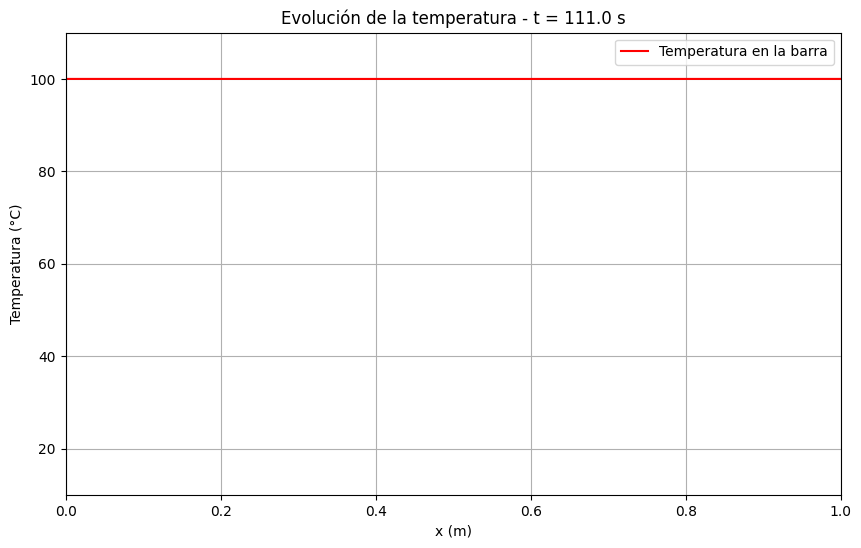

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parámetros físicos y de simulación
L = 1.0       # Longitud de la barra (m)
alpha = 0.01  # Coeficiente de difusión térmica
dx = 0.05     # Espaciado espacial
dt = (0.4 * dx**2) / alpha  # Paso de tiempo estable
t_max = 100   # Tiempo total de simulación (s)
num_frames = 100  # Número de cuadros en la animación

# Discretización espacial y temporal
N = int(L / dx) + 1
pasos_tiempo = int(t_max / dt)
x = np.linspace(0, L, N)
T = np.ones(N) * 20  # Condición inicial T(i,0) = 20
T[0] = 100  # Condición de frontera izquierda
T[-1] = 100  # Condición de frontera derecha

# Valor de lambda para estabilidad
lambda_val = alpha * dt / dx**2

# Matriz para almacenar la evolución en el tiempo
T_hist = [T.copy()]
intervalos_guardado = pasos_tiempo // num_frames  # Guardar cada cierto paso de tiempo

# Iteración en el tiempo
for t in range(pasos_tiempo):
    T_new = T.copy()
    for i in range(1, N-1):
        T_new[i] = lambda_val * T[i+1] + (1 - 2 * lambda_val) * T[i] + lambda_val * T[i-1]
    T = T_new
    if t % intervalos_guardado == 0:  # Guardar cada ciertos pasos
        T_hist.append(T.copy())

# Crear la animación
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot(x, T_hist[0], color='red', label="Temperatura en la barra")
ax.set_title('Evolución de la temperatura en la barra')
ax.set_xlabel('x (m)')
ax.set_ylabel('Temperatura (°C)')
ax.set_ylim(10, 110)
ax.set_xlim(0, L)
ax.legend()
ax.grid(True)

def actualizar(frame):
    line.set_ydata(T_hist[frame])
    ax.set_title(f'Evolución de la temperatura - t = {frame * t_max / num_frames:.1f} s')
    return line,

ani = animation.FuncAnimation(fig, actualizar, frames=len(T_hist), interval=100)
ani.save("evolucion_calor.gif", writer="pillow", fps=15)

plt.show()


MovieWriter imagemagick unavailable; using Pillow instead.


KeyboardInterrupt: 

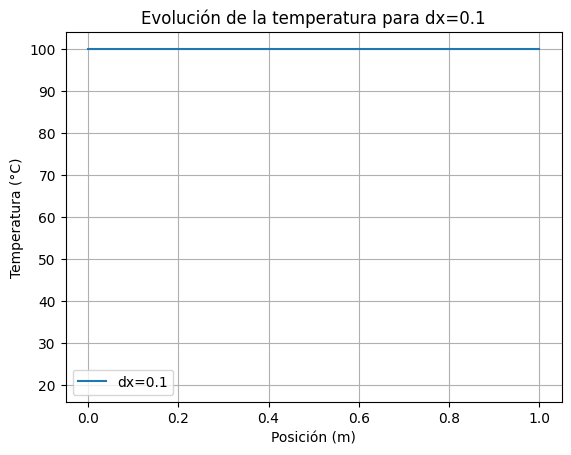

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parámetros del problema
alpha = 1.0  # Coeficiente de difusión térmica
L = 1.0  # Longitud del dominio
T0 = 20.0  # Temperatura inicial
T_left = 100.0  # Temperatura en el borde izquierdo
T_right = 100.0  # Temperatura en el borde derecho
t_max = 1000  # Tiempo máximo de simulación

# Mallados espaciales
dx_values = [0.1, 0.05, 0.01]

# Función para resolver la ecuación de calor
def solve_heat_equation(dx):
    x = np.arange(0, L + dx, dx)
    N = len(x) - 1
    
    # Calcular el paso de tiempo para cumplir con la condición de estabilidad
    dt = 0.4 * dx**2 / alpha  # 0.4 es un factor de seguridad para asegurar lambda <= 0.5
    lambda_val = alpha * dt / dx**2
    
    if lambda_val > 0.5:
        raise ValueError("La condición de estabilidad no se cumple: lambda > 0.5")
    
    T = np.full(N + 1, T0)
    T[0] = T_left
    T[-1] = T_right
    
    # Almacenar solo cada 10 pasos de tiempo para reducir la cantidad de datos
    save_interval = int(10 / dt)
    T_history = []
    
    for t in np.arange(0, t_max, dt):
        if t % save_interval < dt:  # Guardar solo en intervalos específicos
            T_history.append(T.copy())
        
        T_new = T.copy()
        for i in range(1, N):
            T_new[i] = lambda_val * T[i+1] + (1 - 2*lambda_val) * T[i] + lambda_val * T[i-1]
        T = T_new
        T[0] = T_left
        T[-1] = T_right
    
    return x, T_history, dt

# Crear la animación y guardarla como GIF
def create_animation(x, T_history, dt, dx):
    fig, ax = plt.subplots()
    line, = ax.plot(x, T_history[0], label=f'dx={dx}')
    ax.set_xlabel('Posición (m)')
    ax.set_ylabel('Temperatura (°C)')
    ax.set_title(f'Evolución de la temperatura para dx={dx}')
    ax.legend()
    ax.grid(True)
    ax.set_ylim(T0, T_left)  # Fijar límites del eje y para mejor visualización
    
    def update(frame):
        line.set_ydata(T_history[frame])
        return line,
    
    # Crear la animación con menos frames para mejorar el rendimiento
    ani = animation.FuncAnimation(fig, update, frames=len(T_history), interval=50, blit=True)
    ani.save(f'heat_equation_dx_{dx}.gif', writer='imagemagick', fps=10)  # Guardar como GIF
    plt.close()

# Simulación y creación de GIFs
for dx in dx_values:
    print(f"Simulando para dx = {dx}...")
    x, T_history, dt = solve_heat_equation(dx)
    create_animation(x, T_history, dt, dx)
    print(f"GIF guardado para dx = {dx}")

print("Simulación completada.")